# 第一题：决策树处理分类任务

1.	使用sklearn.tree.DecisionTreeClassifier完成dota2比赛结果预测问题
2.	计算最大深度为10时，十折交叉验证的精度(accuracy)，查准率(precision)，查全率(recall)，F1值
3.	绘制最大深度从1到10的决策树十折交叉验证精度的变化图

## 1. 读取数据

In [1]:
import numpy as np
dota2results = np.loadtxt('data/dota2Dataset/dota2Train.csv', delimiter=',')

In [2]:
dota2x = dota2results[:, 1:]
dota2y = dota2results[:, 0]

## 2. 导入模型

In [3]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

## 3. 训练与预测
计算最大深度为10的决策树，在使用数据dota2x，标记dota2y下，十折交叉验证的精度，查准率，查全率和F1值

In [4]:
model = DecisionTreeClassifier(max_depth = 10) # 参数max_depth决定了决策树的最大深度

# YOUR CODE HERE
prediction = cross_val_predict(model, dota2x, dota2y, cv = 10)
Acc = accuracy_score(dota2y,prediction)
Pre = precision_score(dota2y,prediction)
Recall = recall_score(dota2y,prediction)
F1 = f1_score(dota2y,prediction)

In [5]:
print("Dota2:\n","Accuracy:",Acc,"\nPrecision:",Pre,"\nRecall:",Recall,"\nF1:",F1)

Dota2:
 Accuracy: 0.5504803022126282 
Precision: 0.5565114068441065 
Recall: 0.720081177483498 
F1: 0.6278171971903987


最大深度为10：  

｜精度 | 查准率 | 查全率 | F1
｜-| - | - | -
0.5504803022126282   | 0.5566664025984315  | 0.720081177483498   | 0.0.6278171971903987

## 4. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到10，决策树十折交叉验证精度的变化图

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# YOUR CODE HERE
Accs=[]
for i in range(1,10):
    model = DecisionTreeClassifier(max_depth = i)
    prediction = (cross_val_predict(model, dota2x, dota2y, cv = 10))
    Accs.append(accuracy_score(dota2y,prediction))


In [8]:
Accs.append(Acc)

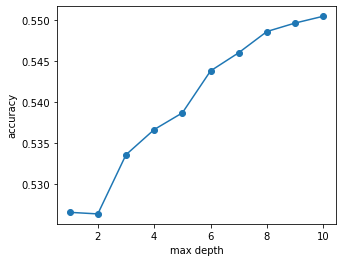

In [9]:
i=np.arange(1,11,1)
plt.figure(figsize = (5, 4))
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.plot(i,Accs,'-o')
#for i in range(0,10):
    #plt.plot(i,Pres[i],'-')


# 5. （选做）通过调整参数，得到一个泛化能力最好的模型

查看决策树文档，通过调整决策树的参数，得到一个最好的模型  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier  
并在下方给出参数的设定与其泛化性能指标

由于最大深度设置为10时，模型精度仍处于上升阶段，我们先继续增加最大深度以找到其峰值。

In [11]:
Accs=[]
for i in range(1,41):
    model = DecisionTreeClassifier(max_depth = i)
    prediction = (cross_val_predict(model, dota2x, dota2y, cv = 10))
    Accs.append(accuracy_score(dota2y,prediction))

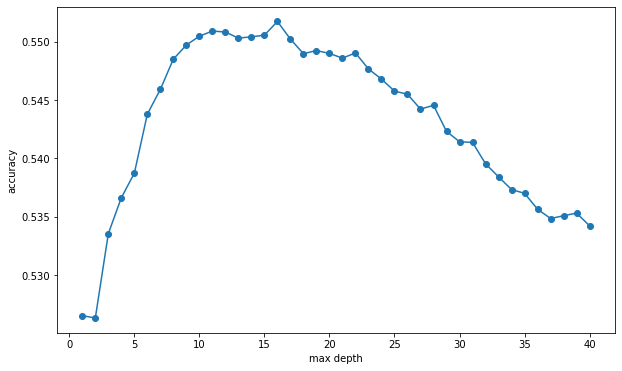

In [13]:
i=np.arange(1,41,1)
plt.figure(figsize = (10, 6))
plt.xlabel("max depth")
plt.ylabel("accuracy")
plt.plot(i,Accs,'-o')

如图所示，最大深度为16时得到的精度最好，接下来根据文档调整其他参数，建立并比较以下三个模型。

In [21]:
model_0= DecisionTreeClassifier(max_depth = 16)
model_1= DecisionTreeClassifier(max_depth = 16,max_features='auto')
model_2=DecisionTreeClassifier(max_depth = 16,max_features='auto',min_samples_leaf=2)
model_3=DecisionTreeClassifier(max_depth = 16,max_features='auto',min_samples_leaf=2,criterion='entropy')

In [22]:
prediction = (cross_val_predict(model_0, dota2x, dota2y, cv = 10))
print(accuracy_score(prediction,dota2y),precision_score(prediction,dota2y),recall_score(prediction,dota2y),f1_score(prediction,dota2y))

0.5518834322719913 0.6908080849493665 0.5603984434762364 0.6188071541371332


In [23]:
prediction = (cross_val_predict(model_1, dota2x, dota2y, cv = 10))
print(accuracy_score(prediction,dota2y),precision_score(prediction,dota2y),recall_score(prediction,dota2y),f1_score(prediction,dota2y))

0.543907177549919 0.7367471608380141 0.5499196694973606 0.6297694875456689


In [24]:
prediction = (cross_val_predict(model_2, dota2x, dota2y, cv = 10))
print(accuracy_score(prediction,dota2y),precision_score(prediction,dota2y),recall_score(prediction,dota2y),f1_score(prediction,dota2y))

0.5472746896923907 0.7318888114468451 0.5529433629140919 0.6299547423489867


In [25]:
prediction = (cross_val_predict(model_3, dota2x, dota2y, cv = 10))
print(accuracy_score(prediction,dota2y),precision_score(prediction,dota2y),recall_score(prediction,dota2y),f1_score(prediction,dota2y))

0.5488397193739881 0.7296748800787176 0.5543701719411911 0.6300557571466501


###### 双击此处填写参数设置与性能指标的结果

参数设置：  


性能指标得分：

参数设置|精度|查准率|查全率|F1
-|-|-|-|-
max_depth = 16|0.5518834322719913| 0.6908080849493665| 0.5603984434762364 |0.6188071541371332
max_depth = 16,max_features='auto'|0.543907177549919| 0.7367471608380141| 0.5499196694973606| 0.6297694875456689
max_depth = 16,max_features='auto',min_samples_leaf=2|0.5472746896923907| 0.7318888114468451| 0.5529433629140919| 0.6299547423489867
max_depth = 16,max_features='auto',min_samples_leaf=2,criterion='entropy'|0.5488397193739881 |0.7296748800787176 |0.5543701719411911| 0.6300557571466501

由表中结果可知，model_3的泛化能力更好一些。